<a href="https://colab.research.google.com/github/AryanGoyal123/Machine-learning-Projects/blob/main/PersonalCNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# 90% of the code is the same as MNIST

In [ ]:
x_train.shape   #3 color channels

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

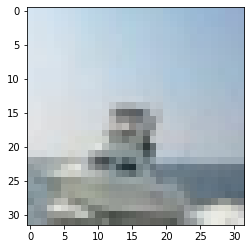

In [ ]:
plt.imshow(x_train[100])

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
#we need to change the labels, so we need categorical values

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
y_cat_test = to_categorical(y_test,10)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
#'same' in padding would be applied padding when it is needed the most

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), input_shape = (32,32,3), activation='relu'))#the filter, kernal size, strides, and padding are the parameters
model.add(MaxPool2D(pool_size=(2,2)))
#add more layers
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), input_shape = (32,32,3), activation='relu'))#the filter, kernal size, strides, and padding are the parameters
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) #this will flatten 32*32 to a 3072 long array for the dense layer
model.add(Dense(256, activation='relu'))

#output layers
model.add(Dense(10, activation='softmax')) #multiclass problems

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
#hyperparameters are based on data. The input size, the flatten, and the dense layer according to the number of classes
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4682 - accuracy: 0.4710 - val_loss: 1.2783 - val_accuracy: 0.5521
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1464 - accuracy: 0.5963 - val_loss: 1.1277 - val_accuracy: 0.6046
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9982 - accuracy: 0.6497 - val_loss: 1.0817 - val_accuracy: 0.6296
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8890 - accuracy: 0.6872 - val_loss: 0.9931 - val_accuracy: 0.6592
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7903 - accuracy: 0.7209 - val_loss: 0.9665 - val_accuracy: 0.6767
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7170 - accuracy: 0.7483 - val_loss: 0.9362 - val_accuracy: 0.6902
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6402 - accuracy: 0.7740 - val_loss: 0.9528 -

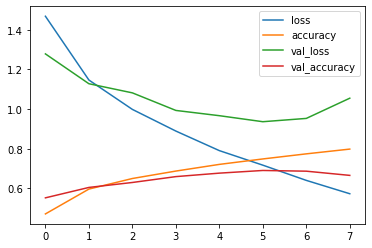

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.plot()

# from sklearn.metrics import classification_report, confusion_matrix
# predictions  = model.predict(x_test) 
# my_number = x_test[1]
# plt.imshow(my_number.reshape(28,28))
# model.predict(my_number.reshape(1,28,28,1))

array([[3.2530141e-03, 9.9870749e-04, 1.2108049e-09, 4.0612327e-09,
        3.9465748e-12, 5.7187904e-11, 2.0428668e-10, 3.8656114e-14,
        9.9574798e-01, 3.0537851e-07]], dtype=float32)

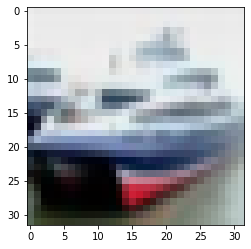

In [ ]:
 from sklearn.metrics import classification_report, confusion_matrix
 predictions  = model.predict(x_test) 
 my_number = x_test[1]
plt.imshow(my_number)
 model.predict(my_number.reshape(1,32,32,3))